## 1. Import libraries

# References:
1. https://www.kaggle.com/hely333/eda-regression

# Dataset
1. https://www.kaggle.com/fayomi/advertising
2. https://www.kaggle.com/harlfoxem/housesalesprediction
3. https://github.com/awesomedata/awesome-public-datasets
4. https://www.kdnuggets.com/datasets/index.html
5. https://www.kaggle.com/devashish0507/big-mart-sales-prediction
6. https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)

In [37]:
import warnings
import pandas                  as pd
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from matplotlib              import pyplot as plt
from IPython.core.display    import HTML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
from sklearn.ensemble        import RandomForestRegressor
from sklearn                 import linear_model
from sklearn                 import metrics

warnings.filterwarnings('ignore')

## 1.1. Helper Functions

In [38]:
# --- Jupyter Notebook Settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [39]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 2. Loading Data

In [40]:
df_raw = pd.read_csv( '../data/insurance.csv' )

In [41]:
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
# 3. EDA (  Exploration Data Analysis )
---

## 3.1. Descriptive Statistics

In [42]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 3.2. Univariate Analysis

## 3.2.1. Response Variable

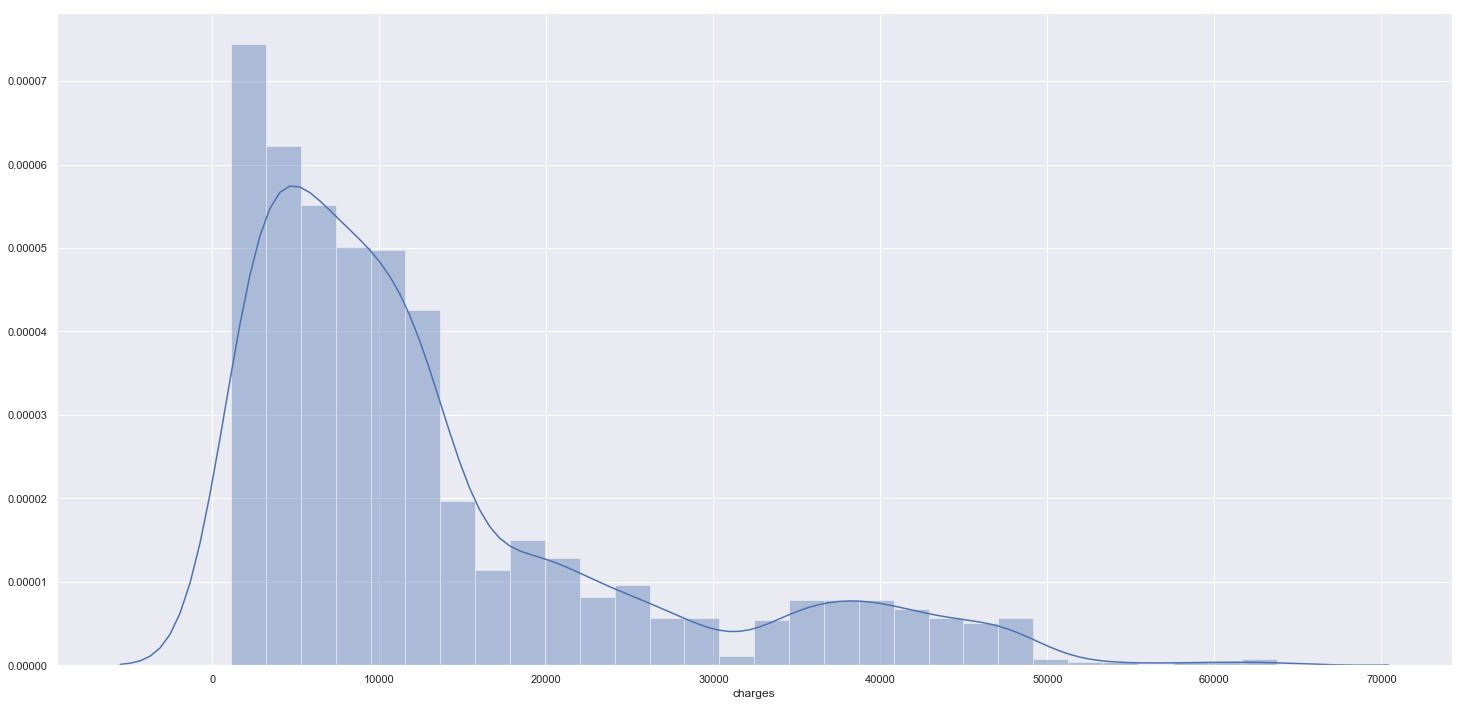

In [43]:
sns.distplot( df_raw['charges'] );

## 3.2.1. Predictors

### AGE

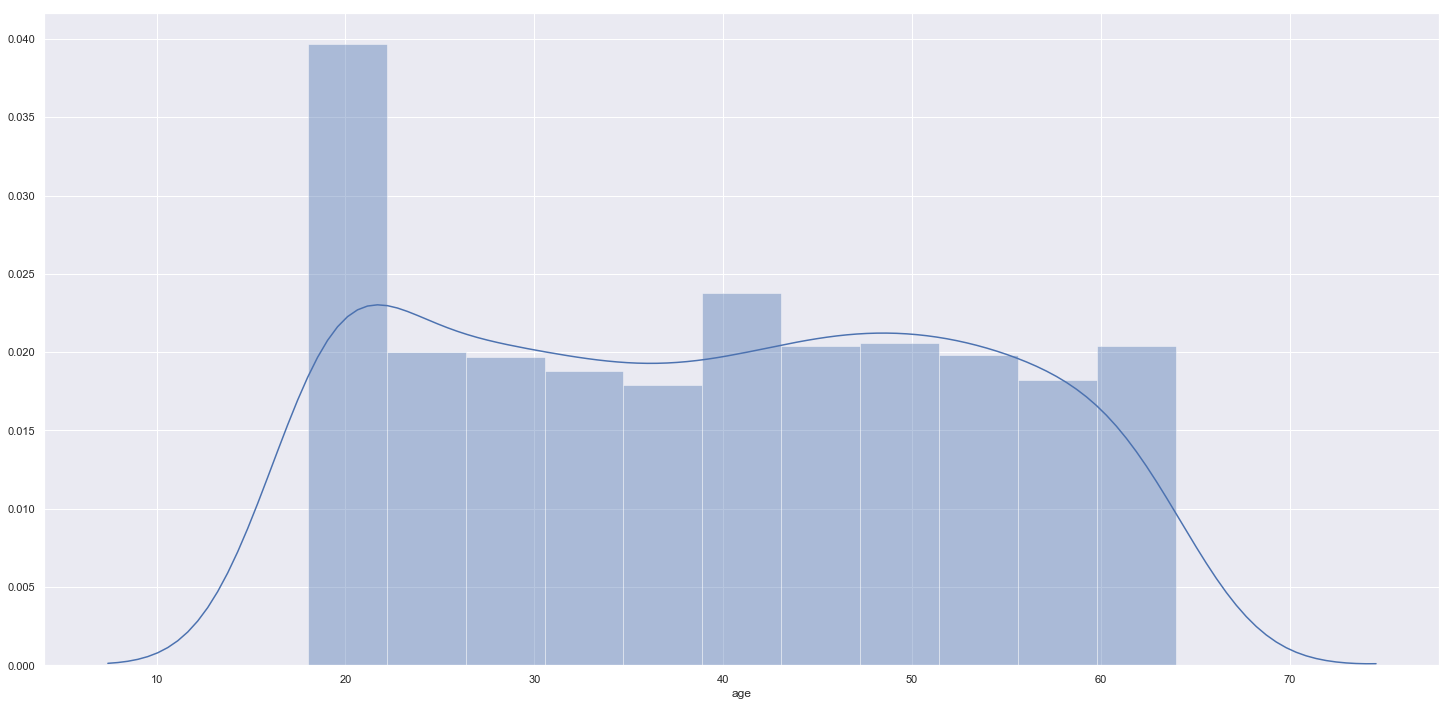

In [44]:
age = sns.distplot( df_raw['age'] )

### BMI

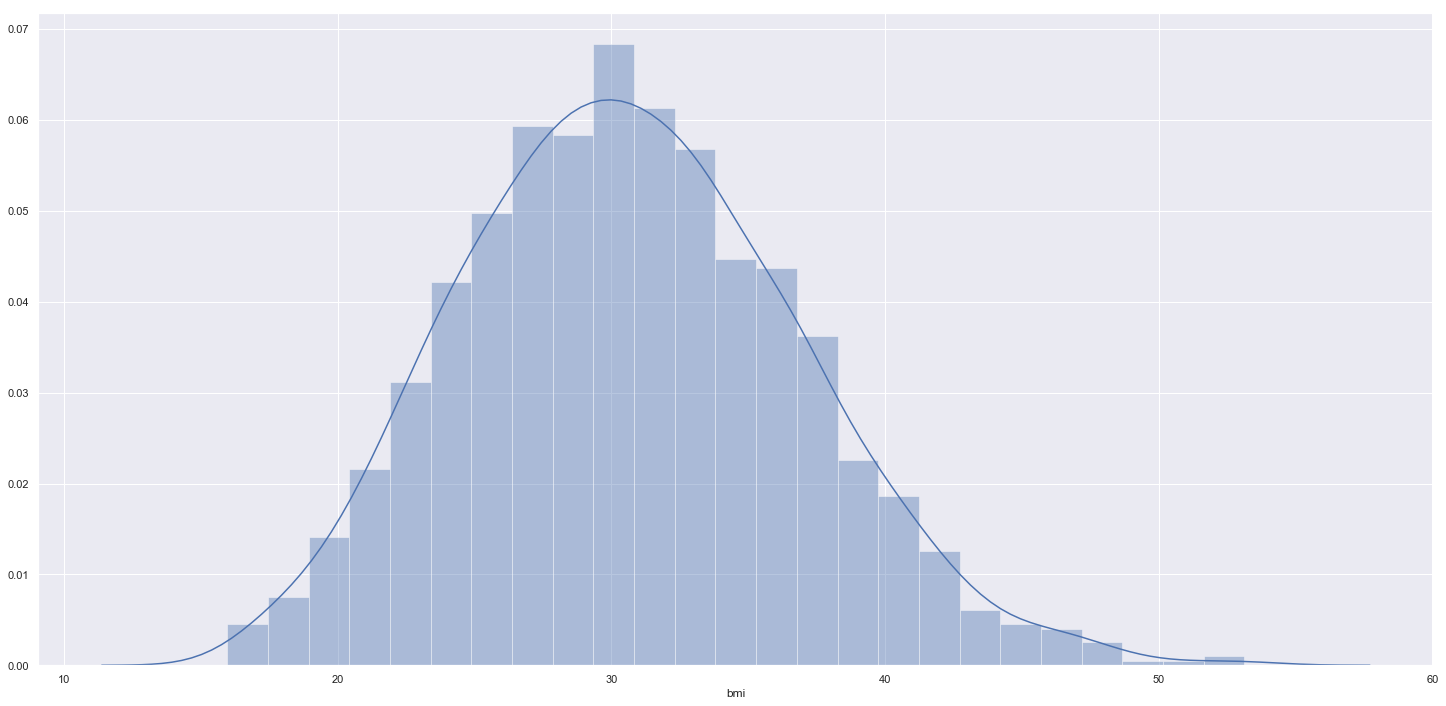

In [45]:
sns.distplot( df_raw['bmi'] )

### CHILDREN

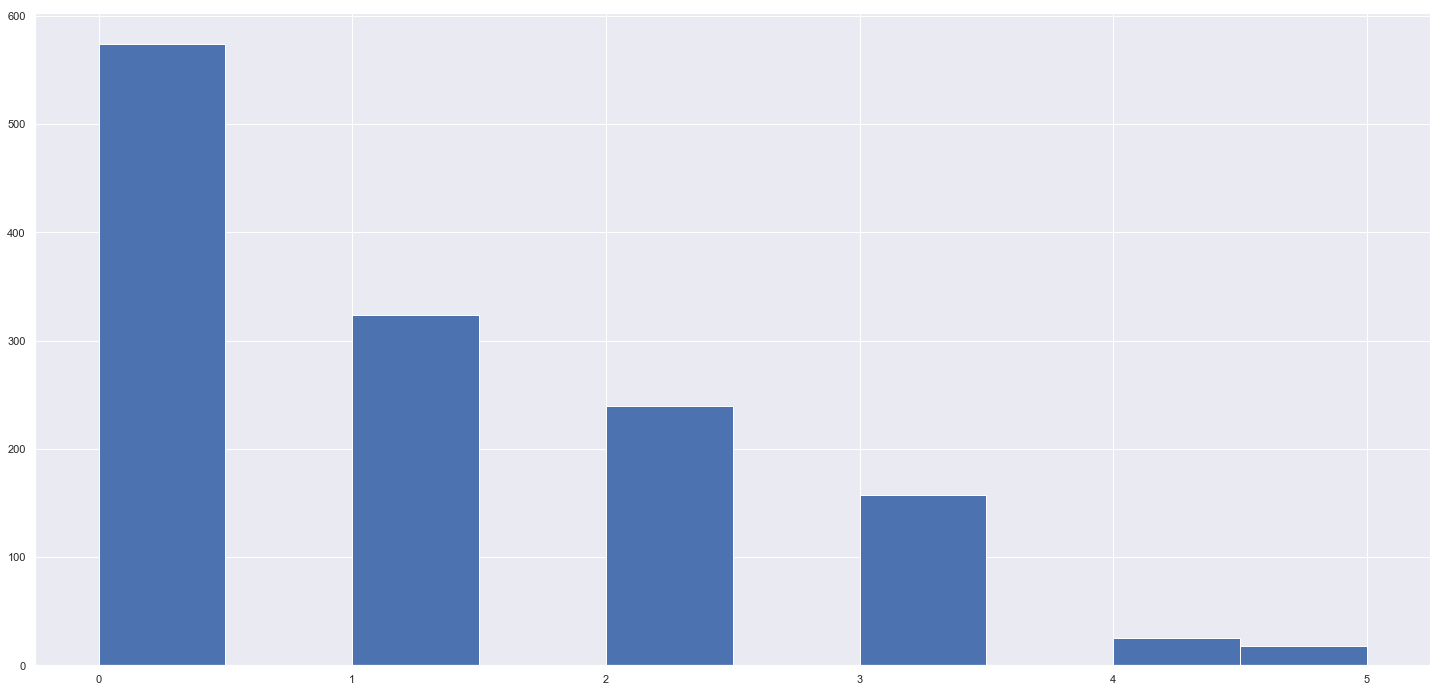

In [46]:
plt.hist( df_raw['children'] );

## 3.3. Bivariate Analysis

### 3.3.1. Numerical Predictors

In [47]:
num_features = df_raw.select_dtypes( include=[np.number] )
num_features.dtypes

# Correlation
corr = num_features.corr()
print( corr['charges'].sort_values( ascending=False ) )

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


### Age x Charges 

In [48]:
a = df_raw[['age', 'charges']].groupby( 'age' ).sum().reset_index()

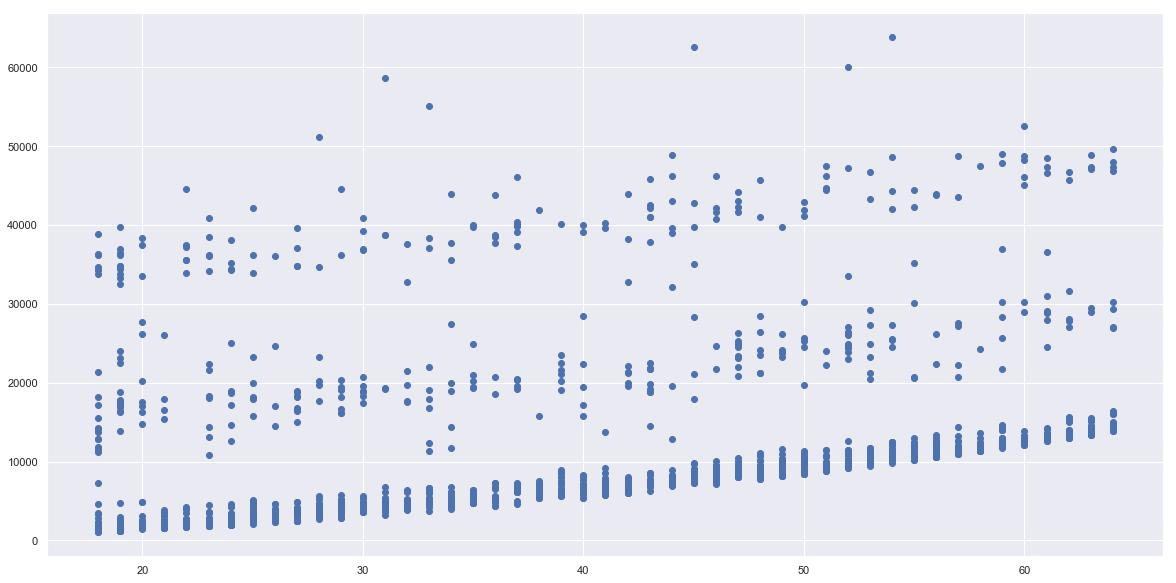

In [49]:
plt.figure( figsize=(20, 10) )
plt.scatter( df_raw['age'], df_raw['charges'] )

### BMI x Charges 

In [50]:
#a = df_raw[['bmi', 'charges']].groupby( 'bmi' ).sum().reset_index()

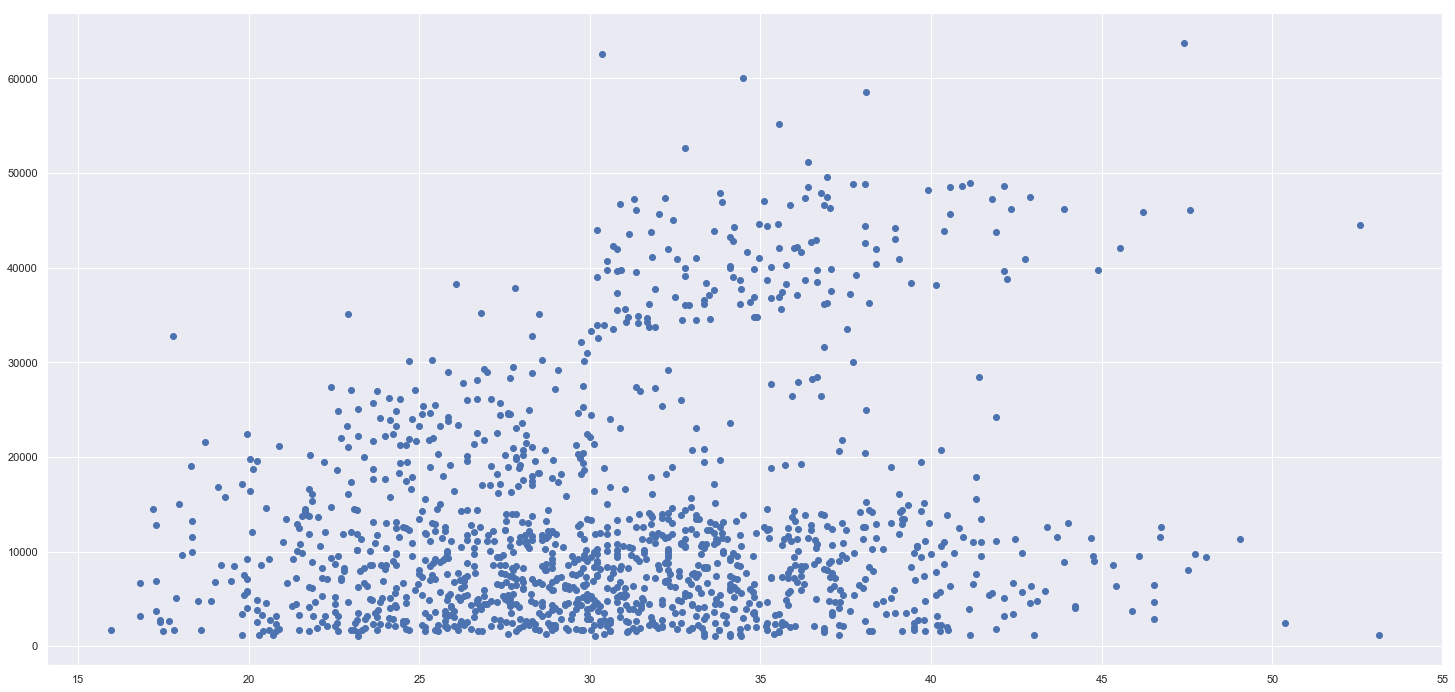

In [51]:
plt.scatter( df_raw['bmi'], df_raw['charges'] );

### Children x Charges 

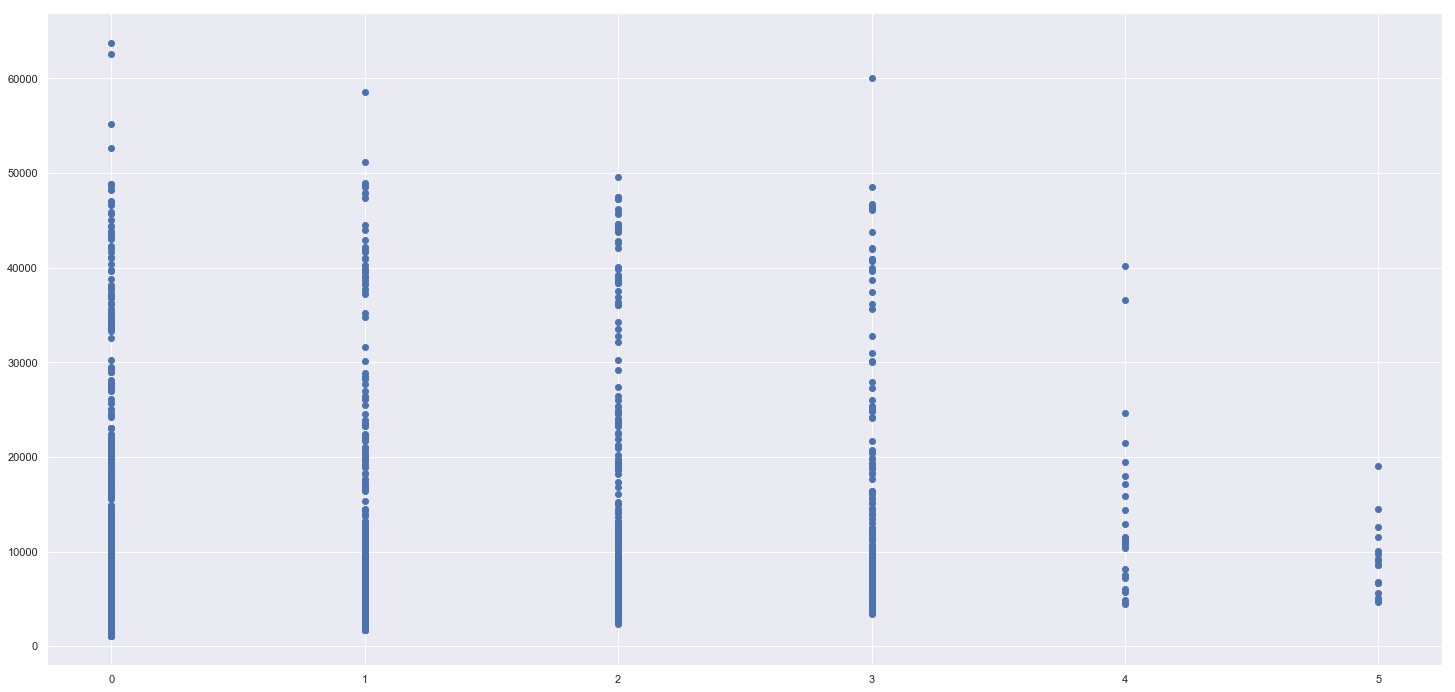

In [52]:
a = df_raw[['children', 'charges']].groupby( 'children' ).sum().reset_index()
plt.scatter( df_raw['children'], df_raw['charges'] );

### 3.3.2. Categorical Predictors

In [53]:
df_raw.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [54]:
cat_features = df_raw.select_dtypes( exclude=[np.number] )
cat_features.dtypes


sex       object
smoker    object
region    object
dtype: object

### Charges X Sex

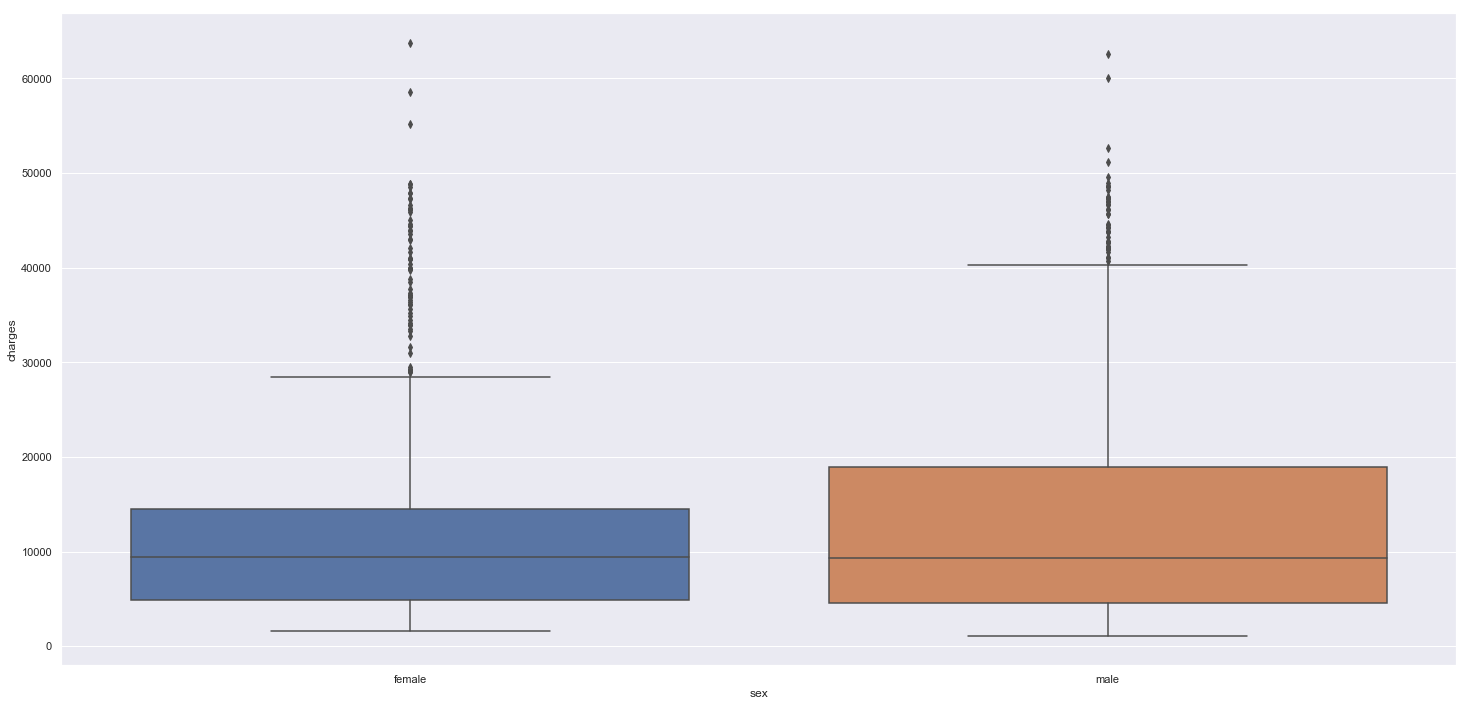

In [55]:
sns.boxplot( df_raw['sex'], df_raw['charges'] );

### Charges X Smoker

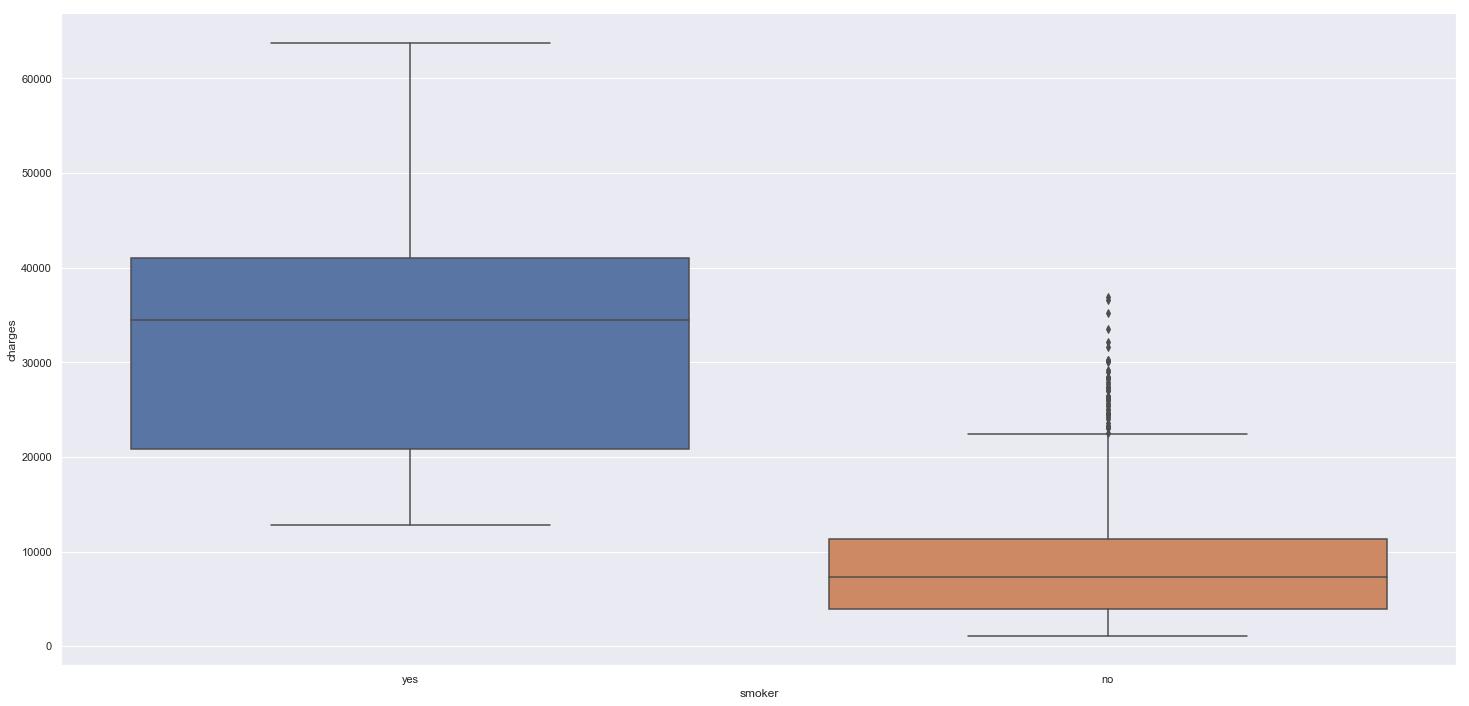

In [56]:
sns.boxplot( df_raw['smoker'], df_raw['charges'] );

### Charges X Region

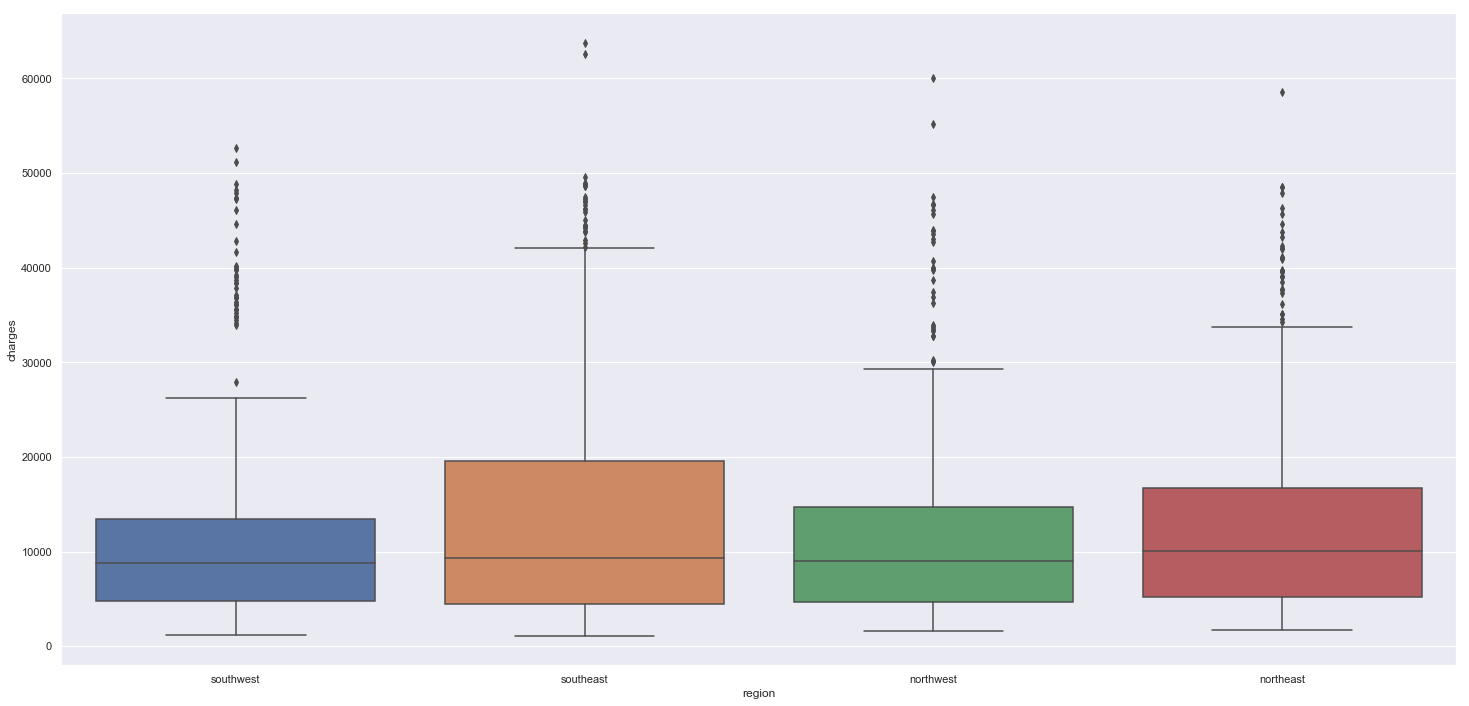

In [57]:
sns.boxplot( df_raw['region'], df_raw['charges'] );

## 3.4. Multivariate Analysis

---
# 4. Data Preprocessing  
---

## 4.1. Transformations 

In [58]:
data = df_raw

In [59]:
# Label Encode the column: Sex
le = LabelEncoder()
le.fit( data['sex'].drop_duplicates() )
data['sex_label'] = le.transform( data['sex'] )
data = data.rename( columns={'sex_label': 'male_label'} )

# Label Encode the column: Smoker
le.fit( data['smoker'].drop_duplicates() )
data['smoker_label'] = le.transform( data['smoker'] )

# Dummy Encode the column: Region
d = pd.get_dummies( data['region'] )
data = pd.concat( [data, d], axis=1 )

# BMI Chart
data['bmi_cat'] = data['bmi'].apply( lambda x: 'underweight' if x <=18 else 'healthy' if (x >=19)&(x <=24) else 'overweight' if (x >=25)&(x <=29) else 'obese' if (x >=30)&(x <= 39) else 'extremely_obese' ) 

# Label Encode BMI
data['bmi_label'] = data['bmi'].apply( lambda x: 0 if x=='underweight' else 1 if x=='healthy' else 2 if x=='overweight' else 3 if x=='obese' else 4 ) 

# Dummy Encode the column: BMI_Label
d1 = pd.get_dummies( data['bmi_cat'] )
data = pd.concat( [ data, d1], axis=1 )

In [60]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male_label,smoker_label,northeast,northwest,southeast,southwest,bmi_cat,bmi_label,extremely_obese,healthy,obese,overweight,underweight
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1,overweight,4,0,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0,obese,4,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0,obese,4,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0,healthy,4,0,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0,overweight,4,0,0,0,1,0


## 4.2. Standardizing and Rescaling 

## 4.3. Binarization and Normalized

---
# 5. Feature Engineering  
---

## 5.1. Create Features

## 5.2. Feature Selection

### 5.2.1. Univariate Selection

### 5.2.2. Recursive Feature Elimination

### 5.2.3. Principal Component Analysis

## 5.3. Split Data into Train and Test Sets

In [61]:
X = data.drop( 'charges', axis=1 )
y = data['charges']

In [135]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

---
# 6. Modelling
---

In [122]:
X_train.head()

,age,sex,bmi,children,smoker,region,male_label,smoker_label,northeast,northwest,southeast,southwest,bmi_cat,bmi_label,extremely_obese,healthy,obese,overweight,underweight
1296,18,male,26.125,0,no,northeast,1,0,1,0,0,0,overweight,4,0,0,0,1,0
226,28,male,38.060,0,no,southeast,1,0,0,0,1,0,obese,4,0,0,1,0,0
1057,45,female,31.790,0,no,southeast,0,0,0,0,1,0,obese,4,0,0,1,0,0
10,25,male,26.220,0,no,northeast,1,0,1,0,0,0,overweight,4,0,0,0,1,0
332,61,female,31.160,0,no,northwest,0,0,0,1,0,0,obese,4,0,0,1,0,0


In [136]:
train_cols = ['age', 'male_label', 'bmi', 'children', 'smoker_label', 'northeast', 'northwest', 'southeast', 'southwest']

X_train_ = X_train[ train_cols ]
X_test_ = X_test[ train_cols ]

## 6.1. Average Model

In [139]:
X_test_.head()

,age,male_label,bmi,children,smoker_label,northeast,northwest,southeast,southwest
533,37,1,36.190,0,0,0,0,1,0
485,31,0,31.065,0,0,1,0,0,0
967,44,1,25.365,1,0,0,1,0,0
1175,22,0,27.100,0,0,0,0,0,1
215,41,0,37.100,2,0,0,0,0,1


In [140]:
# Prediction
pred_avg = np.repeat( np.mean( y_train ), len( y_test ), axis=0 )

# Performance
mse = metrics.mean_squared_error( pred_avg, y_test )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( pred_avg, y_test )

print( 'RMSE: {}\n'.format( rmse ) )

avg_results = pd.DataFrame( {'Model': 'Avg Model', 'RMSE': rmse}, index=[0]  )
print( avg_results )

RMSE: 12951.105624334059

       Model          RMSE
0  Avg Model  12951.105624


## 6.2. Linear Regression

In [141]:
# sklearn
lm = linear_model.LinearRegression()
model = lm.fit( X_train_, y_train ) 

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_lm = lm.predict( X_test_ )

# Performance
mse = metrics.mean_squared_error( pred_lm, y_test )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( pred_lm, y_test )

print( 'RMSE: {}\n'.format( rmse ) )

lm_results = pd.DataFrame( {'Model':'Linear Regression', 'RMSE': rmse }, index=[0] )
print( lm_results )


Performance
RMSE: 5986.843028653079

               Model         RMSE
0  Linear Regression  5986.843029


## 6.3. Regularized Linear Regression - LASSO

In [129]:
X_train[ train_cols ].head()

,age,male_label,bmi,children,smoker_label,region
1296,18,1,26.125,0,0,northeast
226,28,1,38.060,0,0,southeast
1057,45,0,31.790,0,0,southeast
10,25,1,26.220,0,0,northeast
332,61,0,31.160,0,0,northwest


In [145]:
# sklearn
lasso = linear_model.Lasso( alpha=0.05 ).fit( X_train_, y_train ) 

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_lasso = lasso.predict( X_test_ )

# Performance
mse = metrics.mean_squared_error( pred_lasso, y_test )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( pred_lasso, y_test )

print( 'RMSE: {}\n'.format( rmse ) )

lasso_results = pd.DataFrame( {'Model':' Lasso Linear Regression', 'RMSE': rmse }, index=[0] )
print( lasso_results )


Performance
RMSE: 5986.843068196159

                      Model         RMSE
0   Lasso Linear Regression  5986.843068


## 6.4. Poisson Model

In [73]:
X_train_poisson.head()

,const,age,male_label,bmi,children,smoker_label,northeast,northwest,southeast,southwest
1337,1.0,61,0,29.07,0,1,0,1,0,0
430,1.0,19,1,33.10,0,0,0,0,0,1
441,1.0,33,0,33.50,0,1,0,0,0,1
1079,1.0,63,1,33.66,3,0,0,0,1,0
155,1.0,44,1,39.52,0,0,0,1,0,0


In [130]:
# Train
X_train_poisson = X_train[ train_cols ]

## Test
X_test_poisson = X_test[ train_cols ]

# OLS
pm = smf.glm( formula=f, data=X_train_, family=sm.families.Poisson() ).fit()
print( pm.summary() )

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_poisson = pm.predict( X_test_ )

# Performance
mse = metrics.mean_squared_error( pred_poisson, y_test )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( pred_poisson, y_test )

print( 'RMSE: {}\n'.format( rmse ) )

pm_results = pd.DataFrame( {'Model':'Poisson Regression', 'RMSE': rmse }, index=[0] )
print( pm_results )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3071e+06
Date:                Mon, 08 Apr 2019   Deviance:                   2.6024e+06
Time:                        06:58:13   Pearson chi2:                 3.23e+06
No. Iterations:                     5   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.4396      0.002   4543.196      0.000       7.436       7.443
C(region)[T.nort

## 6.5. Hierarchical Linear Model

In [69]:
X_train.head()

,age,sex,bmi,children,smoker,region,male_label,smoker_label,northeast,northwest,southeast,southwest,bmi_cat,bmi_label,extremely_obese,healthy,obese,overweight,underweight
1337,61,female,29.07,0,yes,northwest,0,1,0,1,0,0,extremely_obese,4,1,0,0,0,0
430,19,male,33.10,0,no,southwest,1,0,0,0,0,1,obese,4,0,0,1,0,0
441,33,female,33.50,0,yes,southwest,0,1,0,0,0,1,obese,4,0,0,1,0,0
1079,63,male,33.66,3,no,southeast,1,0,0,0,1,0,obese,4,0,0,1,0,0
155,44,male,39.52,0,no,northwest,1,0,0,1,0,0,extremely_obese,4,1,0,0,0,0


In [134]:
# training data
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
X_train_hier = pd.concat( [X_train, y_train], axis=1 )
X_train_hier = X_train_hier[ cols ]
X_train_hier['smoker_sex'] = X_train_hier['smoker'] + '_' + data['sex']

# Modelling
formula = 'charges ~ age + bmi + children + smoker + region' 
hier = smf.mixedlm( f, data=X_train_, groups=X_train_['smoker_label'], re_formula='~C(region)' ).fit()

print( hier.summary() )

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_hier = hier.predict( X_test_ )

# Performance
mse = metrics.mean_squared_error( pred_hier, y_test )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( pred_hier, y_test )

print( 'RMSE: {}\n'.format( rmse ) )

hier_results = pd.DataFrame( {'Model':'Hierarquical Regression', 'RMSE': rmse }, index=[0] )
print( hier_results )

                                              Mixed Linear Model Regression Results
Model:                                    MixedLM                        Dependent Variable:                        charges      
No. Observations:                         1070                           Method:                                    REML         
No. Groups:                               2                              Scale:                                     35961407.0722
Min. group size:                          225                            Likelihood:                                -10769.0688  
Max. group size:                          845                            Converged:                                 No           
Mean group size:                          535.0                                                                                  
---------------------------------------------------------------------------------------------------------------------------------
      

## 6.6. Random Forest

In [71]:
# Train
X_train_rf = X_train[ train_cols ]

# Test
X_test_rf = X_test[train_cols]

# sklearn
rf = RandomForestRegressor( n_estimators=1000, n_jobs=-1, random_state=0 ).fit( X_train_rf, y_train ) 

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_rf = rf.predict( X_test_rf )

# Performance
mse = metrics.mean_squared_error( pred_rf, y_test )
rmse = np.sqrt( mse )
print( 'RMSE: {}\n'.format( rmse ) )

rf_results = pd.DataFrame( {'Model':'Random Forest', 'RMSE': rmse }, index=[0] )
print( rf_results )


Performance
RMSE: 4627.937769367913

           Model         RMSE
0  Random Forest  4627.937769


---
# 7. Results
---

In [72]:
a = pd.concat( [avg_results, lm_results, lasso_results, pm_results, hier_results, rf_results], axis=0 )
a.sort_values( 'RMSE' )

,Model,RMSE
0,Random Forest,4627.937769
0,Poisson Regression,5928.399666
0,Hierarquical Regression,6035.335764
0,Lasso Linear Regression,6036.517393
0,Linear Regression,6036.602712
0,Avg Model,12168.404153


## 6.1. Training

### 6.1.1. K-Fold Cross-Validation

### 6.1.2. Leave One Out Cross-Validation

In [35]:
# Train
X_train_rf = X_train[ train_cols ]

# Test
X_test_rf = X_test[ train_cols ]

# Model
rf = RandomForestRegressor( n_estimators=1000 ).fit( X_train_rf, y_train )

#print( rf.summary() )

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_rf = pm.predict( X_test_rf )

# Performance
mse = metrics.mean_squared_error( pred_rf, y_test )
rmse = np.sqrt( mse )
print( 'RMSE: {}\n'.format( rmse ) )

rf_results = pd.DataFrame( {'Model':'Random Forest', 'RMSE': rmse }, index=[0] )
print( rf_results )


Performance


ValueError: shapes (268,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

In [39]:
X_test_rf.shape

(268, 9)

In [38]:
X_train_rf.shape

(1070, 9)